In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

hs_blau = "#22376f"
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#0645ad", "#800020", "#1EB9E7", ])

In [2]:
bevölkerung = pd.read_excel(f"Data\\12411-0012_complete.xlsx", index_col=0)

#read sterbefälle pro monat
sterbefälle_monat = pd.read_excel(f"Data\\sonderauswertung-sterbefaelle_groß.xlsx", sheet_name='BL_2016_2022_Monate_AG_Ins') #Datensatz ist selbst zusammengebaut
sterbefälle_monat = sterbefälle_monat[sterbefälle_monat.columns].replace(["-",".","X "],0)
print(sterbefälle_monat.loc[sterbefälle_monat["Bundesland"]=="Baden-Württemberg"][["Bundesland", "Altersgruppe", "Insgesamt"]])

            Bundesland Altersgruppe  Insgesamt
35   Baden-Württemberg    Insgesamt     118703
36   Baden-Württemberg         0-65      15768
37   Baden-Württemberg        65-75      17172
38   Baden-Württemberg        75-85      36168
39   Baden-Württemberg   85 u. mehr      49595
115  Baden-Württemberg    Insgesamt     116006
116  Baden-Württemberg         0-65      14888
117  Baden-Württemberg        65-75      15800
118  Baden-Württemberg        75-85      36901
119  Baden-Württemberg   85 u. mehr      48417
195  Baden-Württemberg    Insgesamt     111582
196  Baden-Württemberg         0-65      14999
197  Baden-Württemberg        65-75      15276
198  Baden-Württemberg        75-85      36159
199  Baden-Württemberg   85 u. mehr      45148
275  Baden-Württemberg    Insgesamt     111134
276  Baden-Württemberg         0-65      15233
277  Baden-Württemberg        65-75      15288
278  Baden-Württemberg        75-85      35858
279  Baden-Württemberg   85 u. mehr      44755
355  Baden-Wü

### Zusammenfassen der Altergruppen für Bundesländer vergleich

In [3]:
bevölkerung

,Jahr,Alter,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Gesamt
1,1990,unter 1 Jahr,119162,136550,41485,29040,6851,16629,62328,23291,83095,199981,43012,11215,49556,31411,29179,28657,911442
2,1990,1-Jährige,114672,129986,38824,31792,6552,15550,60670,25424,79748,192662,41210,10950,53584,33451,28288,30488,893851
3,1990,2-Jährige,116459,130981,39899,34300,6537,15772,60841,27284,81154,195867,42553,11180,56712,36113,28726,33405,917783
4,1990,3-Jährige,110080,124102,38900,35986,6235,14534,58403,29125,77700,188769,41173,10953,59380,37339,27379,34428,894486
5,1990,4-Jährige,109664,123680,37737,35290,6026,13868,56944,28284,76474,184442,40529,10981,58300,36631,26005,34154,879009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,2020,87-Jährige,38312,43512,10243,10105,2244,5301,20549,6791,27702,62723,14619,3985,17717,9317,9953,8377,291450
2849,2020,88-Jährige,33330,38699,8576,8811,1938,4580,18106,6091,24439,55507,12764,3583,15081,8137,8488,7415,255545
2850,2020,89-Jährige,29520,33392,7694,7667,1749,4168,15998,5061,22048,49406,11429,3179,13748,7079,7715,6428,226281
2851,2020,90 Jahre und mehr,108225,122252,30029,26464,7160,17250,62984,16715,83231,184859,43862,10966,51868,24957,29586,23283,843691


### Aufteilung der Altersgruppen pro Bundesland

In [4]:
bundesland = bevölkerung.columns.values.tolist()[2:]
memory = []

for year in range(1990,2021,1):
    #Auswahl der Länder
    bevölkerungs_jahr = bevölkerung.loc[bevölkerung.Jahr== year].reset_index(drop=True)
    for land in bundesland:
        bevölkerung_kleiner_65 =  bevölkerungs_jahr[land].iloc[0:65].sum() # 0-> 64
        memory.append([year,land,(str(0)+" -< "+str(65)), bevölkerung_kleiner_65])
        bevölkerung_kleiner_75 =  bevölkerungs_jahr[land].iloc[65:75].sum() # 65-> 74
        memory.append([year,land,(str(65)+" -< "+str(75)), bevölkerung_kleiner_75])
        bevölkerung_kleiner_85 =  bevölkerungs_jahr[land].iloc[75:85].sum() # 75-> 84
        memory.append([year,land,(str(75)+" -< "+str(85)), bevölkerung_kleiner_85])
        bevölkerung_groesser_85 = bevölkerungs_jahr[land].iloc[85:91].sum() # 85> 74
        memory.append([year,land,(str(85)+"<"), bevölkerung_groesser_85])
        gesamt = bevölkerung_kleiner_65 + bevölkerung_kleiner_75 + bevölkerung_kleiner_85 + bevölkerung_groesser_85
        memory.append([year,land,"Gesamt", gesamt])

new_df = pd.DataFrame(memory, columns=["Jahr","Bundesland","Alter", "Anzahl"])
new_df

,Jahr,Bundesland,Alter,Anzahl
0,1990,Baden-Württemberg,0 -< 65,8417865
1,1990,Baden-Württemberg,65 -< 75,733976
2,1990,Baden-Württemberg,75 -< 85,537443
3,1990,Baden-Württemberg,85<,132743
4,1990,Baden-Württemberg,Gesamt,9822027
...,...,...,...,...
2630,2020,Gesamt,0 -< 65,64883395
2631,2020,Gesamt,65 -< 75,8867174
2632,2020,Gesamt,75 -< 85,6898530
2633,2020,Gesamt,85<,2505932


### Rohe Sterberate

In [5]:
new_df_2020 = new_df.loc[new_df["Jahr"]==2020]
new_df_2020_gesamt = new_df_2020.loc[new_df["Alter"]=="Gesamt"]
new_df_2020_gesamt = new_df_2020_gesamt[:-1]
new_df_2020_gesamt

,Jahr,Bundesland,Alter,Anzahl
2554,2020,Baden-Württemberg,Gesamt,11103043
2559,2020,Bayern,Gesamt,13140183
2564,2020,Berlin,Gesamt,3664088
2569,2020,Brandenburg,Gesamt,2531071
2574,2020,Bremen,Gesamt,680130
2579,2020,Hamburg,Gesamt,1852478
2584,2020,Hessen,Gesamt,6293154
2589,2020,Mecklenburg-Vorpommern,Gesamt,1610774
2594,2020,Niedersachsen,Gesamt,8003421
2599,2020,Nordrhein-Westfalen,Gesamt,17925570


In [6]:
#print(sterbefälle_monat)
sterbefälle_monat_2020 = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2020) & (sterbefälle_monat["Altersgruppe"]=="Insgesamt")][["Insgesamt", "Bundesland"]].sort_values("Bundesland")
sterbefälle_monat_2020
new_df_2020_gesamt["Todesfaelle"] = sterbefälle_monat_2020["Insgesamt"].to_list()
new_df_2020_gesamt["Rohe_Sterberate"] = (new_df_2020_gesamt["Todesfaelle"]/new_df_2020_gesamt["Anzahl"]) * 100000
new_df_2020_gesamt["delta_zu_gesamtsterberate"] = (new_df_2020_gesamt["Rohe_Sterberate"]) - 1185.2223348940
new_df_2020_gesamt




,Jahr,Bundesland,Alter,Anzahl,Todesfaelle,Rohe_Sterberate,delta_zu_gesamtsterberate
2554,2020,Baden-Württemberg,Gesamt,11103043,116006,1044.812670,-140.409665
2559,2020,Bayern,Gesamt,13140183,143367,1091.057864,-94.164471
2564,2020,Berlin,Gesamt,3664088,37642,1027.322488,-157.899847
2569,2020,Brandenburg,Gesamt,2531071,34633,1368.314046,183.091711
2574,2020,Bremen,Gesamt,680130,8151,1198.447356,13.225021
2579,2020,Hamburg,Gesamt,1852478,18308,988.297837,-196.924498
2584,2020,Hessen,Gesamt,6293154,70051,1113.130236,-72.092098
2589,2020,Mecklenburg-Vorpommern,Gesamt,1610774,21854,1356.739058,171.516723
2594,2020,Niedersachsen,Gesamt,8003421,96980,1211.731833,26.509498
2599,2020,Nordrhein-Westfalen,Gesamt,17925570,214313,1195.571466,10.349131


In [7]:
new_df_2020_gesamt = new_df_2020_gesamt[new_df_2020_gesamt.columns].replace(["Mecklenburg-Vorpommern", "Nordrhein-Westfalen", "Baden-Württemberg","Rheinland-Pfalz","Schleswig-Holstein", ],["MV", "NRW", "BaWü", "RLP","SH" ])
new_df_2020_gesamt

,Jahr,Bundesland,Alter,Anzahl,Todesfaelle,Rohe_Sterberate,delta_zu_gesamtsterberate
2554,2020,BaWü,Gesamt,11103043,116006,1044.812670,-140.409665
2559,2020,Bayern,Gesamt,13140183,143367,1091.057864,-94.164471
2564,2020,Berlin,Gesamt,3664088,37642,1027.322488,-157.899847
2569,2020,Brandenburg,Gesamt,2531071,34633,1368.314046,183.091711
2574,2020,Bremen,Gesamt,680130,8151,1198.447356,13.225021
2579,2020,Hamburg,Gesamt,1852478,18308,988.297837,-196.924498
2584,2020,Hessen,Gesamt,6293154,70051,1113.130236,-72.092098
2589,2020,MV,Gesamt,1610774,21854,1356.739058,171.516723
2594,2020,Niedersachsen,Gesamt,8003421,96980,1211.731833,26.509498
2599,2020,NRW,Gesamt,17925570,214313,1195.571466,10.349131


In [8]:
new_df_2020_gesamt = new_df_2020_gesamt.sort_values(by=["delta_zu_gesamtsterberate"])
new_df_2020_gesamt = new_df_2020_gesamt.reset_index(drop= True)
bundesland_sorted_by_delta = new_df_2020_gesamt["Bundesland"].to_list()


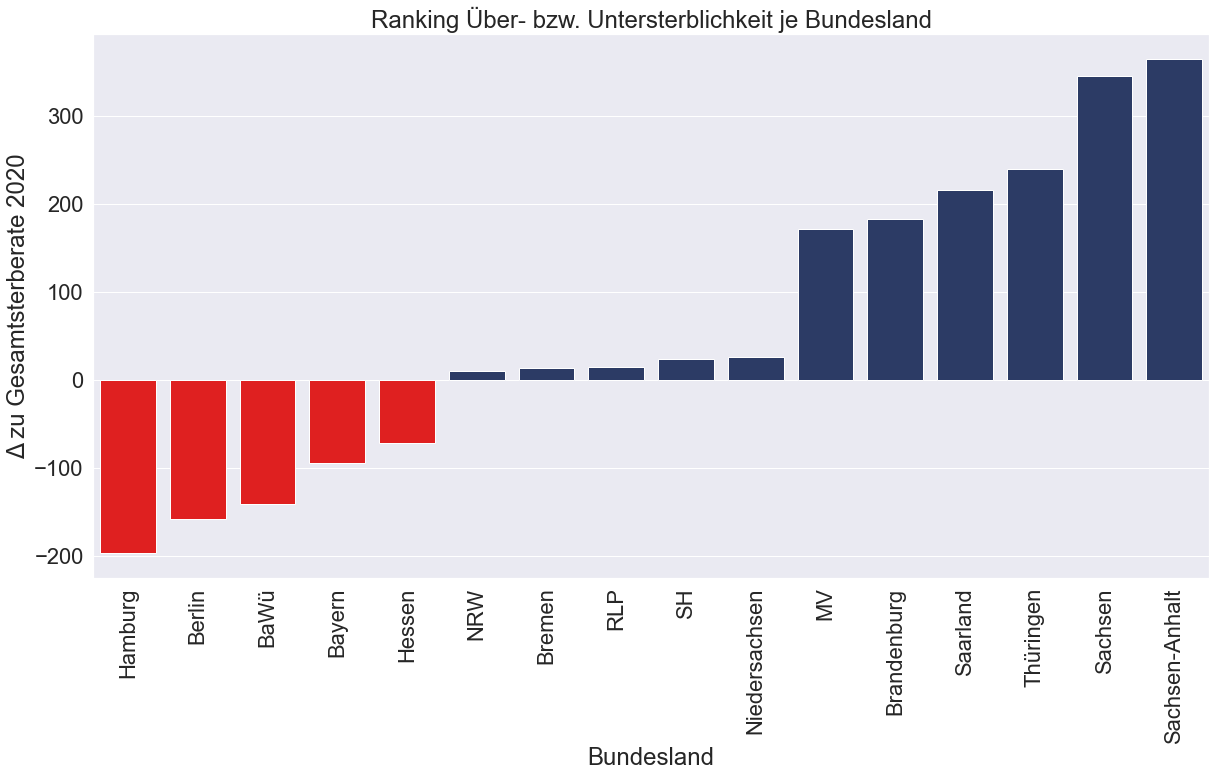

In [18]:
clrs = ['red' if y<=0 else hs_blau for y in new_df_2020_gesamt.delta_zu_gesamtsterberate]


barplot_todesfaelle_sorted = sns.barplot(data = new_df_2020_gesamt, x= new_df_2020_gesamt.Bundesland, y = new_df_2020_gesamt.delta_zu_gesamtsterberate, order= bundesland_sorted_by_delta,  palette=clrs)
sns.set(font_scale=2)



barplot_todesfaelle_sorted.set_ylabel("Δ zu Gesamtsterberate 2020")

barplot_todesfaelle_sorted.set_title("Ranking Über- bzw. Untersterblichkeit je Bundesland")
barplot_todesfaelle_sorted.set_xticklabels(barplot_todesfaelle_sorted.get_xticklabels(),rotation = 90)

plt.gcf().set_size_inches(20, 10)

### Altersbereinigung

In [10]:
# list of bundesländer
bundesland_list = ["Schleswig-Holstein", "Hamburg", "Niedersachsen", "Bremen", "Nordrhein-Westfalen", "Hessen", "Rheinland-Pfalz", "Baden-Württemberg", "Bayern",
"Saarland", "Berlin", "Brandenburg", "Mecklenburg-Vorpommern", "Sachsen", "Sachsen-Anhalt", "Thüringen"]

In [11]:
# Standardbevölkerung = Bevölkerung von 2020 aus RLP
standardbev_rlp = new_df.loc[(new_df["Bundesland"]=="Rheinland-Pfalz") & (new_df["Jahr"]==2020)]
standardbev_rlp = standardbev_rlp.reindex(np.roll(standardbev_rlp.index, shift=1)).reset_index(drop=True) #Gesamt auf ersten Platz schieben
print(standardbev_rlp)


   Jahr       Bundesland     Alter   Anzahl
0  2020  Rheinland-Pfalz    Gesamt  4098391
1  2020  Rheinland-Pfalz   0 -< 65  3186030
2  2020  Rheinland-Pfalz  65 -< 75   459450
3  2020  Rheinland-Pfalz  75 -< 85   326464
4  2020  Rheinland-Pfalz       85<   126447


In [12]:
#Sterbefälle nur auf 2020 begrenzen
sterbefälle_monat_2020_age = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2020)].reset_index(drop=True)
sterbefälle_monat_2020_age


,Nr.,Jahr,Bundesland,Altersgruppe,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Insgesamt
0,161,2020,Schleswig-Holstein,Insgesamt,3222,2929,3192,2886,2769,2703,2756,2898,2779,2941,2799,3318,35192
1,162,2020,Schleswig-Holstein,0-65,462,380,466,417,416,413,425,406,388,421,388,414,4996
2,163,2020,Schleswig-Holstein,65-75,495,441,488,436,434,440,442,443,444,499,453,506,5521
3,164,2020,Schleswig-Holstein,75-85,1095,1048,1110,970,948,889,919,1002,946,973,969,1146,12015
4,165,2020,Schleswig-Holstein,85 u. mehr,1170,1060,1128,1063,971,961,970,1047,1001,1048,989,1252,12660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,236,2020,Thüringen,Insgesamt,2619,2432,2632,2544,2273,2198,2261,2290,2290,2440,2588,3659,30226
76,237,2020,Thüringen,0-65,338,331,373,339,323,313,355,321,329,330,332,386,4070
77,238,2020,Thüringen,65-75,394,375,426,397,318,337,360,305,375,380,370,505,4542
78,239,2020,Thüringen,75-85,911,855,888,827,769,744,718,772,769,828,900,1265,10246


In [13]:
#Altersbereinigen

sterberaten_bereinigt = []
gesamt_bev = standardbev_rlp.loc[standardbev_rlp.index[0]]["Anzahl"]

for bundesland in bundesland_list:
    bundesland_df = sterbefälle_monat_2020_age.loc[sterbefälle_monat_2020_age["Bundesland"]==bundesland][["Bundesland", "Altersgruppe", "Insgesamt"]].reset_index(drop=True)
    bevölkerung_je_bundesland = new_df.loc[(new_df["Bundesland"]==bundesland) & (new_df["Jahr"]==2020)].reset_index(drop=True)
    
    erg_sum = 0
    sum = 0

    for j in range(1,5): #loop über Indexe der Altersgruppen, index 0 ist gesamt

        asx = standardbev_rlp.loc[standardbev_rlp.index[j]]["Anzahl"] #bevölkerung je altersgruppe Standardbevölkerung
        sterbefälle_je_grp = bundesland_df.loc[bundesland_df.index[j]]["Insgesamt"] #Sterbefälle je Bevölkerungsgruppe        
        bevölkerung_grp = bevölkerung_je_bundesland.loc[bevölkerung_je_bundesland.index[j-1]]["Anzahl"] #größe Bevölkerungsruppe untersuchte Bevölkerung

        subx = (sterbefälle_je_grp / bevölkerung_grp) * 100000
        sum += (asx * subx)  

    erg = sum / gesamt_bev
    erg_sum += erg  
    
    sterberaten_bereinigt.append([bundesland, erg_sum])

sterberaten_bereinigt = pd.DataFrame(sterberaten_bereinigt, columns=["Bundesland", "Sterberate_bereinigt"])
sterberaten_bereinigt

,Bundesland,Sterberate_bereinigt
0,Schleswig-Holstein,1162.393798
1,Hamburg,1133.872802
2,Niedersachsen,1202.933394
3,Bremen,1224.501773
4,Nordrhein-Westfalen,1215.847526
5,Hessen,1168.574853
6,Rheinland-Pfalz,1199.714717
7,Baden-Württemberg,1098.565018
8,Bayern,1162.658512
9,Saarland,1299.765028


### Abweichung zu Erwartungswert (Sterblichkeit in RLP) hinzufügen

In [14]:
pd.options.display.float_format = '{:.10f}'.format
sterberaten_bereinigt["delta_zu_gesamtsterberate"] = (sterberaten_bereinigt["Sterberate_bereinigt"]) - 1199.714717
print(sterberaten_bereinigt)

                Bundesland  Sterberate_bereinigt  delta_zu_gesamtsterberate
0       Schleswig-Holstein       1162.3937978089             -37.3209191911
1                  Hamburg       1133.8728017884             -65.8419152116
2            Niedersachsen       1202.9333944293               3.2186774293
3                   Bremen       1224.5017731366              24.7870561366
4      Nordrhein-Westfalen       1215.8475263204              16.1328093204
5                   Hessen       1168.5748529377             -31.1398640623
6          Rheinland-Pfalz       1199.7147173122               0.0000003122
7        Baden-Württemberg       1098.5650179978            -101.1496990022
8                   Bayern       1162.6585115914             -37.0562054086
9                 Saarland       1299.7650278979             100.0503108979
10                  Berlin       1156.2239821140             -43.4907348860
11             Brandenburg       1233.9893673974              34.2746503974
12  Mecklenb

### Sortieren nach Abweichung

In [15]:
#Namen kürzen
sterberaten_bereinigt = sterberaten_bereinigt[sterberaten_bereinigt.columns].replace(["Mecklenburg-Vorpommern", "Nordrhein-Westfalen", "Baden-Württemberg","Rheinland-Pfalz","Schleswig-Holstein", ],["MV", "NRW", "BaWü", "RLP","SH" ])

In [16]:
sterberaten_bereinigt = sterberaten_bereinigt.sort_values(by=["delta_zu_gesamtsterberate"])
sterberaten_bereinigt = sterberaten_bereinigt.reset_index(drop= True)
bundesland_sorted_by_delta_altersbereinigt = sterberaten_bereinigt["Bundesland"].to_list()
sterberaten_bereinigt

,Bundesland,Sterberate_bereinigt,delta_zu_gesamtsterberate
0,BaWü,1098.5650179978,-101.1496990022
1,Hamburg,1133.8728017884,-65.8419152116
2,Berlin,1156.2239821140,-43.4907348860
3,SH,1162.3937978089,-37.3209191911
4,Bayern,1162.6585115914,-37.0562054086
5,Hessen,1168.5748529377,-31.1398640623
6,RLP,1199.7147173122,0.0000003122
7,Niedersachsen,1202.9333944293,3.2186774293
8,NRW,1215.8475263204,16.1328093204
9,MV,1221.0604219651,21.3457049651


### Plotten mit ranking

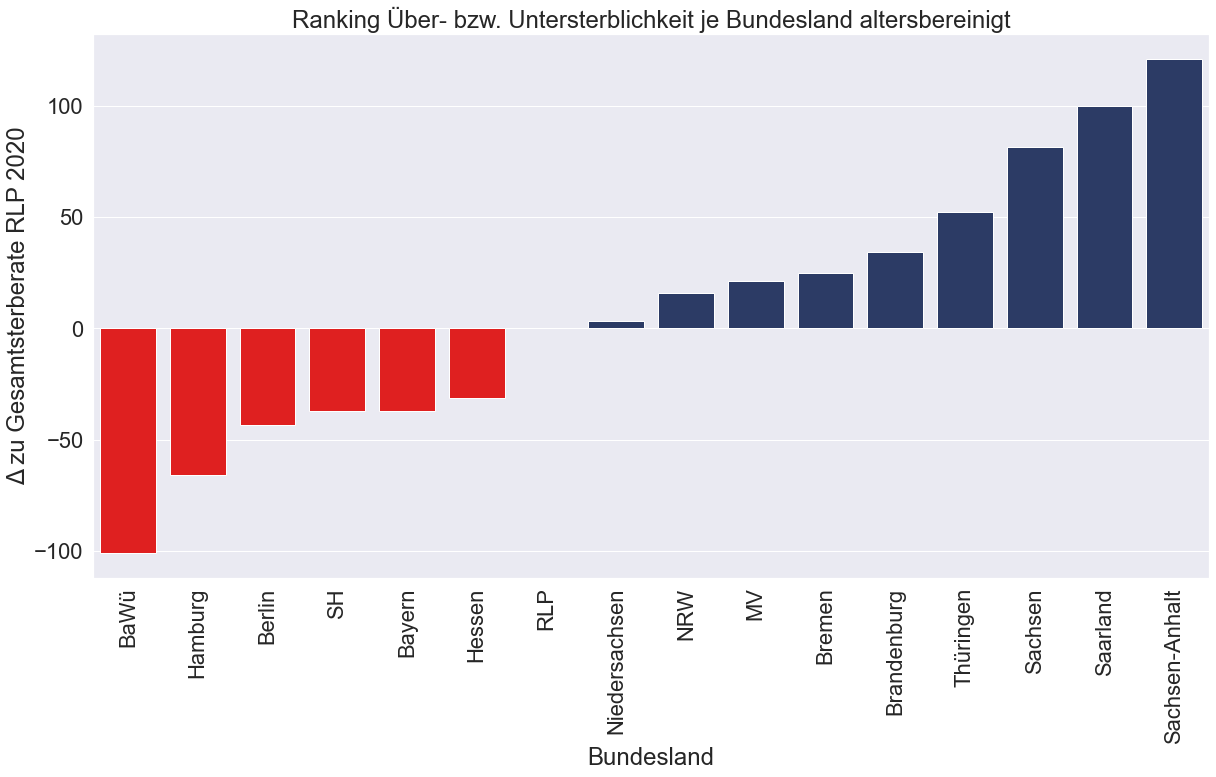

In [17]:
# 

clrs = ['red' if y<=0 else hs_blau for y in sterberaten_bereinigt.delta_zu_gesamtsterberate]


barplot_todesfaelle_sorted_bereinigt = sns.barplot(data = sterberaten_bereinigt, x= sterberaten_bereinigt.Bundesland, y = sterberaten_bereinigt.delta_zu_gesamtsterberate, order= bundesland_sorted_by_delta_altersbereinigt,  palette=clrs)
sns.set(font_scale=2)



barplot_todesfaelle_sorted_bereinigt.set_ylabel("Δ zu Gesamtsterberate RLP 2020")

barplot_todesfaelle_sorted_bereinigt.set_title("Ranking Über- bzw. Untersterblichkeit je Bundesland altersbereinigt")
barplot_todesfaelle_sorted_bereinigt.set_xticklabels(barplot_todesfaelle_sorted_bereinigt.get_xticklabels(),rotation = 90)

plt.gcf().set_size_inches(20, 10)